In [112]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from scipy import stats
import statsmodels.api as sm 

In [113]:
Tickers = [
    '601398.SS',  # Industrial and Commercial Bank of China (ICBC)
    '601288.SS',  # Agricultural Bank of China
    '601988.SS',  # Bank of China
    '601939.SS',  # China Construction Bank
    '600036.SS',  # China Merchants Bank
    '600000.SS',  # Shanghai Pudong Development Bank
    '600016.SS',  # China Minsheng Banking
    '601166.SS',  # Industrial Bank Co.
    '601818.SS',  # China Everbright Bank
    '601328.SS',  # Bank of Communications
    '601229.SS',  # Bank of Shanghai
    '600919.SS',  # Bank of Jiangsu
    '601009.SS',  # Bank of Nanjing
    '600926.SS',  # Bank of Hangzhou
    '600928.SS',  # Bank of Xi’an
    '601577.SS',  # Bank of Changsha
    '601838.SS',  # Bank of Chengdu
    '601997.SS',  # Bank of Guiyang

    '601318.SS',  # Ping An Insurance
    '601628.SS',  # China Life Insurance
    '601601.SS',  # China Pacific Insurance (CPIC)
    '600030.SS',  # CITIC Securities
    '601688.SS',  # Huatai Securities
    '601211.SS',  # Guotai Junan Securities
    '600999.SS',  # China Merchants Securities
    '600837.SS',  # Haitong Securities
    '600958.SS',  # Orient Securities

    '600028.SS',  # China Petroleum & Chemical (Sinopec)
    '601857.SS',  # PetroChina
    '601088.SS',  # China Shenhua Energy
    '600104.SS',  # SAIC Motor
    '600031.SS',  # Sany Heavy Industry
    '601766.SS',  # CRRC Corporation
    '601186.SS',  # China Railway Construction
    '601390.SS',  # China Railway Group
    '601800.SS',  # China Communications Construction
    '600115.SS',  # China Eastern Airlines
    '601111.SS',  # Air China
    '600029.SS',  # China Southern Airlines

    '600519.SS',  # Kweichow Moutai
    '600276.SS',  # Jiangsu Hengrui Pharmaceuticals
    '600703.SS',  # Sanan Optoelectronics
    '600660.SS',  # Fuyao Glass
    '600887.SS',  # Yili Group
    '600585.SS',  # Anhui Conch Cement
    '600104.SS',  # SAIC Motor (dup ok if you dedupe later)
    '600048.SS',  # Poly Developments and Holdings
    '601988.SS',  # Bank of China (dup ok if you dedupe later)
    '601012.SS',  # LONGi Green Energy
    '601888.SS',  # China Tourism Group Duty Free
    '601899.SS',  # Zijin Mining
    '600196.SS',  # Fosun Pharma
    '600050.SS',  # China Unicom
    '600015.SS',  # Hua Xia Bank
    '600690.SS',  # Haier Smart Home
    '600352.SS',  # Zhejiang Longsheng Group
    '600863.SS',  # SDIC Capital
    '600111.SS',  # China National Materials (Sinoma)
    '600104.SS',  # SAIC Motor (listed above; keep once)

    '600009.SS',  # Shanghai International Airport
    '600018.SS',  # Shanghai International Port (SIPG)
    '600021.SS',  # Shanghai Electric Power
    '600011.SS',  # Huaneng Power International
    '600019.SS',  # Baoshan Iron & Steel (Baosteel)
    '600983.SS',  # Hainan Rubber
    '600018.SS',  # SIPG (dup; ok to dedupe)
    '600383.SS',  # GEM Co., Ltd.
    '600233.SS',  # YTO Express
    '601225.SS',  # Shaanxi Coal and Chemical
    '601225.SS',  # Shaanxi Coal (dup guard later)
    '600895.SS',  # Triumph Science & Technology (CITIC)
    '600031.SS',  # Sany Heavy (dup guard later)
    '600886.SS',  # SDIC Power Holdings
    '601238.SS',  # Guangzhou Automobile Group (GAC)
    '601633.SS',  # Great Wall Motor (Shanghai line)
    '600009.SS',  # Shanghai Int’l Airport (dup)

    '600309.SS',  # Wanhua Chemical Group
    '600031.SS',  # Sany Heavy (dup)
    '601006.SS',  # Daqin Railway
    '601225.SS',  # Shaanxi Coal (dup)
    '600340.SS',  # China Fortune Land Development
    '600837.SS',  # Haitong Securities (dup)
    '600208.SS',  # Xinjiang Goldwind Science & Tech (A)
    '600362.SS',  # Jiangxi Copper
    '600066.SS',  # Yutong Bus
    '600016.SS',  # China Minsheng Bank (dup)
    '600745.SS',  # Wingtech Technology
    '600660.SS',  # Fuyao Glass (dup)
    '600188.SS',  # Yanzhou Coal Mining (Yankuang Energy)
    '600685.SS',  # Guangxi Liugong Machinery
    '601117.SS',  # China National Chemical Engineering
    '601211.SS',  # Guotai Junan Securities (dup)
    '600886.SS',  # SDIC Power (dup)
    '600547.SS',  # Shandong Gold Mining
    '601088.SS',  # China Shenhua (dup)
    '600900.SS',  # China Yangtze Power
    '600958.SS',  # Orient Securities (dup)
    '600606.SS',  # Greenland Holdings
    '600048.SS',  # Poly Developments (dup)
    '600637.SS',  # Shanghai Oriental Pearl Group
    '601360.SS',  # 360 Security Technology
    '601668.SS',  # China State Construction Engineering
    '600422.SS',  # Kweichow Moutai Packaging (Guizhou Panjiang? — if needed adjust)
    '600741.SS',  # Huaxin Cement
    '600309.SS',  # Wanhua Chemical (dup)
    '601336.SS',  # New China Life Insurance
    '600150.SS',  # China International Marine Containers (CIMC) A
    '600009.SS',  # Shanghai Intl Airport (dup)
    '600297.SS',  # Pinggao Electric
    '600660.SS',  # Fuyao Glass (dup)
]


In [114]:
stocks = pd.DataFrame()
for t in Tickers:
    stocks[t] = yf.download(t, start='2020-01-01', end='2025-10-10', auto_adjust=True, progress= False)['Close']
stocks


1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')
Failed to get ticker '600297.SS' reason: Failed to perform, curl: (28) Connection timed out after 10014 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.

1 Failed download:
['600297.SS']: YFTzMissingError('possibly delisted; no timezone found')


,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.316445,2.650600,2.651556,5.298242,30.189756,9.553316,4.462318,14.723572,3.144793,3.929528,...,15.093395,5.552670,8.388565,22.909845,4.517717,9.652624,20.381035,41.386230,21.728878,NaN
2020-01-03,4.330906,2.643494,2.644428,5.298242,30.593529,9.652909,4.448286,14.672574,3.123592,3.936447,...,15.175114,5.576399,8.505888,22.909845,4.571227,9.670499,20.172277,41.459480,21.738707,NaN
2020-01-06,4.316445,2.622175,2.630172,5.247507,30.469294,9.545654,4.420221,14.505012,3.081191,3.915691,...,14.872755,5.528941,8.505888,23.119852,4.655313,9.634748,20.937725,40.865341,22.131815,NaN
2020-01-07,4.345367,2.643494,2.651556,5.240258,30.399406,9.576299,4.441270,14.563296,3.109459,3.936447,...,14.864584,5.536850,8.815955,23.272581,4.601803,9.724124,21.154215,41.231594,22.210436,NaN
2020-01-08,4.273064,2.622175,2.630172,5.175026,29.824808,9.438401,4.413205,14.264601,3.059990,3.901855,...,14.750177,5.513121,8.606450,22.680748,4.533005,9.447058,21.811417,40.368870,23.684578,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25,7.380000,6.610000,5.240000,8.730000,40.820000,12.430000,4.060000,20.209999,3.440000,6.850000,...,27.290001,1.810000,9.870000,11.485774,5.470000,14.030000,20.020000,59.230000,34.889999,NaN
2025-09-26,7.410000,6.620000,5.240000,8.660000,40.799999,12.250000,4.050000,20.320000,3.430000,6.820000,...,27.469999,1.810000,9.800000,11.049730,5.430000,13.890000,20.379999,60.369999,34.900002,NaN
2025-09-29,7.330000,6.620000,5.200000,8.600000,40.680000,12.060000,4.010000,20.049999,3.400000,6.800000,...,27.299999,1.830000,10.150000,11.020000,5.440000,14.030000,20.450001,61.709999,34.570000,NaN


In [115]:

# === Crea firm_data con settore e market cap ===
firm_data = pd.DataFrame(columns=['Sector', 'MarketCap'])

for t in stocks.columns:
    try:
        info = yf.Ticker(t).info
        sector = info.get('sector', 'Unknown')
        mcap = info.get('marketCap', np.nan)
    except:
        sector = 'Unknown'
        mcap = np.nan
    
    firm_data.loc[t] = [sector, mcap]

# Mostra anteprima
display(firm_data.head())


,Sector,MarketCap
601398.SS,Financial Services,2.410122e+12
601288.SS,Financial Services,2.355225e+12
601988.SS,Financial Services,1.560885e+12
601939.SS,Financial Services,1.796505e+12
600036.SS,Financial Services,1.020891e+12


In [116]:
# Riepilogo semplice per controllare i settori
print("\nNumero di società per settore:")
print(firm_data['Sector'].value_counts())

# Media e somma della capitalizzazione per settore
print("\nValore medio e totale di market cap per settore (in miliardi):")
print((firm_data.groupby('Sector')['MarketCap'].agg(['mean','sum']) / 1e9).round(2))



Numero di società per settore:
Sector
Financial Services        28
Industrials               17
Basic Materials            8
Consumer Cyclical          8
Real Estate                6
Energy                     5
Utilities                  5
Technology                 4
Healthcare                 3
Unknown                    2
Consumer Defensive         2
Communication Services     2
Name: count, dtype: int64

Valore medio e totale di market cap per settore (in miliardi):
                          mean       sum
Sector                                  
Basic Materials         235.45   1883.60
Communication Services  102.57    205.13
Consumer Cyclical       131.94   1055.50
Consumer Defensive      996.11   1992.22
Energy                  638.94   3194.71
Financial Services      547.68  15334.99
Healthcare              176.83    530.49
Industrials             123.77   2104.10
Real Estate              43.20    259.21
Technology               88.50    354.01
Unknown                    NaN 

In [117]:
S_C_I= yf.download('000001.SS', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [118]:
EEM= yf.download('EEM', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [119]:
EVENT_DATE = pd.Timestamp('2024-09-24')

In [120]:
stocks.index = pd.to_datetime(stocks.index)
stocks_ante= stocks.loc[EVENT_DATE - pd.Timedelta(days=250) : EVENT_DATE - pd.Timedelta(days=20)]
stocks_post= stocks.loc[EVENT_DATE: ]

In [121]:
# ===============================================================
# Test di rappresentatività del benchmark EEM
# (R² medio per settore da regressioni individuali)
# ===============================================================

import statsmodels.api as sm
import numpy as np
import pandas as pd

# Assumiamo di avere già:
# - stocks: dataframe dei prezzi (colonne = ticker)
# - EEM: serie del benchmark
# - firm_data: con colonna 'Sector'
# - stessa finestra di stima dell’HP1 (es. [-250, -30])
# - t0 = EVENT_DATE

# 1️⃣ Calcola i rendimenti logaritmici
ret_stk = np.log(stocks / stocks.shift(1))
ret_bmk = np.log(EEM / EEM.shift(1))
ret_bmk.columns = ['r_EEM']

# 2️⃣ Definisci finestra di stima
est_start = t0 + pd.Timedelta(days=-250)
est_end   = t0 + pd.Timedelta(days=-30)

R2_list = []   # per salvare risultati titolo per titolo

# 3️⃣ Loop su ogni titolo
for tk in ret_stk.columns:
    df = pd.concat([ret_stk[tk], ret_bmk], axis=1).dropna()
    df = df.loc[(df.index >= est_start) & (df.index <= est_end)]
    
    if df.empty: 
        continue
    
    X = sm.add_constant(df['r_EEM'])
    y = df[tk]
    
    try:
        model = sm.OLS(y, X).fit()
        R2 = model.rsquared
        sec = firm_data.loc[tk, 'Sector'] if tk in firm_data.index else 'Unknown'
        R2_list.append({'Ticker': tk, 'Sector': sec, 'R2': R2})
    except:
        continue

# 4️⃣ Crea dataframe risultati
R2_df = pd.DataFrame(R2_list)

# 5️⃣ R² medio per settore
R2_sector = R2_df.groupby('Sector')['R2'].mean().sort_values(ascending=False)

# 6️⃣ Output leggibile
print("\n[R²] Mean explanatory power of EEM by sector:")
display(R2_sector.to_frame().style.format({'R2': '{:.3f}'}))

# (facoltativo) R² medio complessivo
print(f"\nAverage R² across all stocks: {R2_df['R2'].mean():.3f}")



[R²] Mean explanatory power of EEM by sector:


,R2
Sector,
Technology,0.114
Consumer Cyclical,0.078
Real Estate,0.060
Healthcare,0.052
Basic Materials,0.048
Financial Services,0.043
Consumer Defensive,0.043
Communication Services,0.039
Industrials,0.025



Average R² across all stocks: 0.044


In [122]:
# ===============================================================
# Test di rappresentatività del benchmark EEM
# (R² medio per settore da regressioni individuali)
# ===============================================================

import statsmodels.api as sm
import numpy as np
import pandas as pd

# Assumiamo di avere già:
# - stocks: dataframe dei prezzi (colonne = ticker)
# - EEM: serie del benchmark
# - firm_data: con colonna 'Sector'
# - stessa finestra di stima dell’HP1 (es. [-250, -30])
# - t0 = EVENT_DATE

# 1️⃣ Calcola i rendimenti logaritmici
ret_stk = np.log(stocks / stocks.shift(1))
ret_bmk = np.log(S_C_I / S_C_I.shift(1))
ret_bmk.columns = ['r_S_C_I']

# 2️⃣ Definisci finestra di stima
est_start = t0 + pd.Timedelta(days=-250)
est_end   = t0 + pd.Timedelta(days=-30)

R2_list = []   # per salvare risultati titolo per titolo

# 3️⃣ Loop su ogni titolo
for tk in ret_stk.columns:
    df = pd.concat([ret_stk[tk], ret_bmk], axis=1).dropna()
    df = df.loc[(df.index >= est_start) & (df.index <= est_end)]
    
    if df.empty: 
        continue
    
    X = sm.add_constant(df['r_S_C_I'])
    y = df[tk]
    
    try:
        model = sm.OLS(y, X).fit()
        R2 = model.rsquared
        sec = firm_data.loc[tk, 'Sector'] if tk in firm_data.index else 'Unknown'
        R2_list.append({'Ticker': tk, 'Sector': sec, 'R2': R2})
    except:
        continue

# 4️⃣ Crea dataframe risultati
R2_df = pd.DataFrame(R2_list)

# 5️⃣ R² medio per settore
R2_sector = R2_df.groupby('Sector')['R2'].mean().sort_values(ascending=False)

# 6️⃣ Output leggibile
print("\n[R²] Mean explanatory power of S_C_I by sector:")
display(R2_sector.to_frame().style.format({'R2': '{:.3f}'}))

# (facoltativo) R² medio complessivo
print(f"\nAverage R² across all stocks: {R2_df['R2'].mean():.3f}")



[R²] Mean explanatory power of S_C_I by sector:


,R2
Sector,
Communication Services,0.432
Technology,0.409
Real Estate,0.299
Industrials,0.285
Healthcare,0.246
Basic Materials,0.243
Consumer Cyclical,0.206
Financial Services,0.190
Consumer Defensive,0.139



Average R² across all stocks: 0.228


# **HP1**

In [123]:
# ===========================
# HP1 — Event Study completo (Indice + Settori)
# Output indice: r_S_C_I, r_hat, AR, t_AR, CAR, t_CAR
# Significatività: giornaliera (AR) e cumulata (CAR) anche per settori
# ===========================

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ---------------------------
# Parametri e finestre
# ---------------------------
EST_START, EST_END = -250, -30     # finestra di stima
EV_PRE, EV_POST    = 1, 5          # finestra evento
t0 = EVENT_DATE

est_start = t0 + pd.Timedelta(days=EST_START)
est_end   = t0 + pd.Timedelta(days=EST_END)
ev_start  = t0 - pd.Timedelta(days=EV_PRE)
ev_end    = t0 + pd.Timedelta(days=EV_POST)

In [124]:

# ====================================================
# PARTE A — INDICE (Shanghai Composite vs EEM)
# ====================================================

# 1) Log-returns e allineamento
r_S_C_I = np.log(S_C_I / S_C_I.shift(1)).dropna()
r_EEM   = np.log(EEM   / EEM.shift(1)).dropna()
ret_df  = pd.concat([r_S_C_I, r_EEM], axis=1).dropna()
ret_df.columns = ['r_S_C_I','r_EEM']


# 2) Stima del Market Model su [-250,-30]
est_df = ret_df.loc[est_start:est_end]
ev_df  = ret_df.loc[ev_start:ev_end]

X_est = sm.add_constant(est_df['r_EEM'])
y_est = est_df['r_S_C_I']
mm    = sm.OLS(y_est, X_est).fit()
alpha, beta = mm.params['const'], mm.params['r_EEM']
sigma_eps   = mm.resid.std(ddof=int(mm.df_model)+1)  # σ_ε per t-test semplici

# 3) Predizioni, AR e CAR sull’event window [-1,+5]
X_ev   = sm.add_constant(ev_df['r_EEM'])
r_hat  = mm.predict(X_ev)
AR_idx = ev_df['r_S_C_I'] - r_hat
CAR_idx= AR_idx.cumsum()

# 4) Significatività: giornaliera e cumulata
t_AR = AR_idx / sigma_eps

def tstat_car(AR_series, start, end, sigma):
    win = AR_series.loc[start:end]
    n = len(win)
    if n < 1 or sigma is None or sigma <= 0:
        return np.nan
    return win.sum() / (sigma * np.sqrt(n))

t_CAR_01 = tstat_car(AR_idx, t0, t0+pd.Timedelta(days=1), sigma_eps)
t_CAR_03 = tstat_car(AR_idx, t0, t0+pd.Timedelta(days=3), sigma_eps)
t_CAR_05 = tstat_car(AR_idx, t0, t0+pd.Timedelta(days=5), sigma_eps)

# 5) Tabella indice come richiesto
out_idx = pd.DataFrame({
    'r_S_C_I': ev_df['r_S_C_I'],
    'r_hat'  : r_hat,
    'AR'     : AR_idx,
    't_AR'   : t_AR,
    'CAR'    : CAR_idx
})
# aggiungo t_CAR (sull’intera finestra [-1,+5]) solo all’ultima riga
out_idx['t_CAR'] = np.nan
out_idx.loc[out_idx.index.max(), 't_CAR'] = t_CAR_05

print("\n[INDEX] Event window (tabella completa):")
display(out_idx)
print(f"[INDEX] t-CAR[0,1]={t_CAR_01:.3f} | t-CAR[0,3]={t_CAR_03:.3f} | t-CAR[0,5]={t_CAR_05:.3f}")


[INDEX] Event window (tabella completa):


,r_S_C_I,r_hat,AR,t_AR,CAR,t_CAR
Date,,,,,,
2024-09-23,0.004413,0.002497,0.001916,0.226343,0.001916,NaN
2024-09-24,0.040707,0.012096,0.028611,3.380030,0.030526,NaN
2024-09-25,0.011522,-0.004344,0.015866,1.874421,0.046393,NaN
2024-09-26,0.035494,0.013017,0.022476,2.655354,0.068869,NaN
2024-09-27,0.028441,-0.001112,0.029553,3.491415,0.098422,5.70061


[INDEX] t-CAR[0,1]=3.715 | t-CAR[0,3]=5.701 | t-CAR[0,5]=5.701


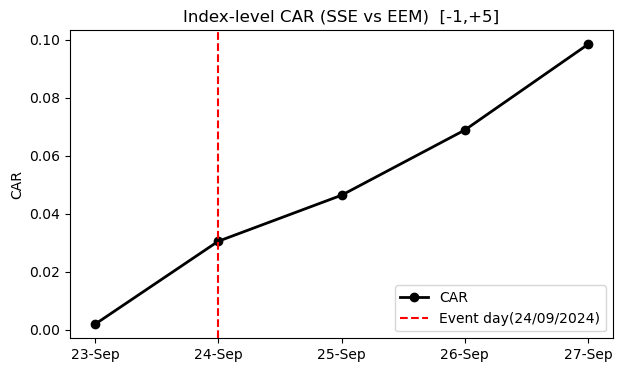

In [125]:
plt.figure(figsize=(7,4))
plt.plot(CAR_idx.index, CAR_idx.values, marker='o', color='black', linewidth=2, label='CAR')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.axvline(t0, color='r', ls='--', label='Event day(24/09/2024)')
plt.title('Index-level CAR (SSE vs EEM)  [-1,+5]')
plt.ylabel('CAR'); plt.legend(); plt.show()

In [126]:

# ====================================================
# PARTE B — SETTORI (equal-weight e value-weight)
# ====================================================

# 0) Safety: firm_data minimo se non esiste
if 'firm_data' not in locals():
    firm_data = pd.DataFrame(index=stocks.columns)
if 'Sector' not in firm_data.columns:
    firm_data['Sector'] = 'Unknown'
firm_data['Sector'] = firm_data['Sector'].fillna('Unknown')

# 1) Returns per-titolo e benchmark
ret_stk = np.log(stocks / stocks.shift(1))    # index=Date, columns=tickers

# Benchmark returns per settore = r_EEM; garantisco sia Series (fix "to_frame")
ret_bmk = np.log(S_C_I / S_C_I.shift(1)).dropna()
if isinstance(ret_bmk, pd.DataFrame):
    if ret_bmk.shape[1] != 1:
        raise ValueError("Benchmark ha più di una colonna: specifica quale usare.")
    ret_bmk = ret_bmk.iloc[:, 0]

bm_est = ret_bmk.loc[est_start:est_end].to_frame(name='BMK')
bm_ev  = ret_bmk.loc[ev_start:ev_end].to_frame(name='BMK')

# 2) Market model per titolo e AR su [-1,+5]
ar_store = {}
for tk in ret_stk.columns:
    y_est = ret_stk[[tk]].loc[est_start:est_end].dropna()
    if y_est.empty:
        continue
    df_est = y_est.join(bm_est, how='inner').dropna()
    if len(df_est) < 30:
        continue

    X = sm.add_constant(df_est['BMK'])
    y = df_est[tk]
    res = sm.OLS(y, X).fit()

    df_ev = ret_stk[[tk]].loc[ev_start:ev_end].join(bm_ev, how='inner').dropna()
    if df_ev.empty:
        continue
    Xev  = sm.add_constant(df_ev['BMK'])
    rhat = res.predict(Xev)
    AR   = df_ev[tk] - rhat
    AR.name = tk
    ar_store[tk] = AR

if not ar_store:
    print("\n[SECTOR] Nessun AR disponibile per l'event window a livello titoli.")
else:
    AR_panel = pd.concat(ar_store.values(), axis=1)  # index=date, columns=tickers

    # 3) Equal-weight AR/CAR per settore
    sector_map  = firm_data['Sector'].astype(str).str.strip()
    sector_cols = pd.Series({tk: sector_map.get(tk, 'Unknown') for tk in AR_panel.columns})
    ew_sector_AR  = AR_panel.groupby(by=sector_cols, axis=1).mean()
    ew_sector_CAR = ew_sector_AR.cumsum()

    # 4) Significatività — giornaliera (AR) per settore
    def t_stat_cs(vec):
        v = pd.Series(vec).dropna()
        if len(v) < 2:
            return np.nan
        return v.mean() / (v.std(ddof=1) / np.sqrt(len(v)))

    # DataFrame t-stat giornalieri: index=date, columns=settori
    tstats_daily = ew_sector_AR.apply(lambda row: AR_panel.loc[row.name].groupby(sector_cols).apply(t_stat_cs), axis=1)
    print("\n[SECTOR] t-stat giornalieri (AR, EW) per ciascun settore:")
    display(tstats_daily)

    # 5) t-stat del CAR per settore ([0,1], [0,3], [0,5]) — cross-section sui titoli del settore
    def t_CAR_sector(AR_panel_sub, start, end):
        sub = AR_panel_sub.loc[start:end]
        car_i = sub.sum(axis=0)  # CAR per ciascun titolo
        return t_stat_cs(car_i)

    a0, b1, b3, b5 = t0, t0+pd.Timedelta(days=1), t0+pd.Timedelta(days=3), t0+pd.Timedelta(days=5)
    rows = []
    for sec in sorted(sector_cols.unique()):
        tick_sec = sector_cols[sector_cols==sec].index
        AR_sec   = AR_panel[tick_sec]
        rows.append({
            'Sector': sec,
            't_CAR_0_1': t_CAR_sector(AR_sec, a0, b1),
            't_CAR_0_3': t_CAR_sector(AR_sec, a0, b3),
            't_CAR_0_5': t_CAR_sector(AR_sec, a0, b5)
        })
    tsec = pd.DataFrame(rows).set_index('Sector').sort_values('t_CAR_0_5', ascending=False)
    print("\n[SECTOR] t-stat CAR per settore (EW):")
    display(tsec)

    # 6) Riepilogo CAR numerici per settore (EW)
    def sum_win(sr, a, b):
        return sr.loc[a:b].sum() if (a in sr.index) and (b in sr.index) else np.nan

    sec_summary = pd.DataFrame({
        'CAR_0_1_EW': ew_sector_AR.apply(sum_win, axis=0, args=(a0,b1)),
        'CAR_0_3_EW': ew_sector_AR.apply(sum_win, axis=0, args=(a0,b3)),
        'CAR_0_5_EW': ew_sector_AR.apply(sum_win, axis=0, args=(a0,b5)),
    }).sort_values('CAR_0_5_EW', ascending=False)
    print("\n[SECTOR] CAR numerici per settore (EW):")
    display(sec_summary)


[SECTOR] t-stat giornalieri (AR, EW) per ciascun settore:


C:\Users\andre\AppData\Local\Temp\ipykernel_56912\3265587283.py:56: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ew_sector_AR  = AR_panel.groupby(by=sector_cols, axis=1).mean()


,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
Date,,,,,,,,,,,
2024-09-23,-0.249448,-0.913882,-1.190066,-3.924196,3.215467,4.787979,-2.005010,-0.661860,-2.206782,-3.465181,3.718280
2024-09-24,-0.649700,-0.745442,-3.230442,4.442099,3.088838,5.005691,-0.639240,-1.648940,-5.011514,-2.020997,0.944630
2024-09-25,0.912759,1.195471,2.135655,3.016599,-0.672411,4.451190,-0.299659,3.100408,1.205065,-0.695272,-1.509220
2024-09-26,-0.184056,-1.688786,1.940782,17.556092,0.215973,5.723385,1.145715,-0.202818,1.056391,-1.742043,-1.774598
2024-09-27,0.262918,-16.065684,1.638915,7.932871,-3.981386,-1.602216,3.209062,-0.800847,2.635656,1.179200,-0.174121



[SECTOR] t-stat CAR per settore (EW):


,t_CAR_0_1,t_CAR_0_3,t_CAR_0_5
Sector,,,
Consumer Defensive,4.118307,15.598682,15.598682
Financial Services,6.683816,4.706528,4.706528
Healthcare,-0.664998,1.304753,1.304753
Consumer Cyclical,-1.410280,0.962318,0.962318
Real Estate,-2.391651,0.503379,0.503379
Industrials,1.179731,0.200988,0.200988
Energy,1.973363,0.172633,0.172633
Basic Materials,0.175424,0.118773,0.118773
Technology,-1.968056,-0.860657,-0.860657



[SECTOR] CAR numerici per settore (EW):


,CAR_0_1_EW,CAR_0_3_EW,CAR_0_5_EW
Basic Materials,0.002108,0.002609,NaN
Communication Services,-0.012090,-0.053879,NaN
Consumer Cyclical,-0.010256,0.014956,NaN
Consumer Defensive,0.064846,0.192358,NaN
Energy,0.021926,0.004285,NaN
Financial Services,0.029747,0.038345,NaN
Healthcare,-0.007177,0.036360,NaN
Industrials,0.007717,0.002417,NaN
Real Estate,-0.035500,0.023043,NaN
Technology,-0.032693,-0.033826,NaN


In [127]:
# === Value-Weighted AR per settore ===
# Usa i market cap dal firm_data (assicurati di averli scaricati)
mcap = firm_data['MarketCap'].fillna(0)
sector_weights = pd.Series(
    [mcap.get(tk, np.nan) for tk in AR_panel.columns],
    index=AR_panel.columns
)


vw_sector_AR = pd.DataFrame(index=AR_panel.index)

for sec in sector_cols.unique():
    tickers = sector_cols[sector_cols == sec].index
    w = sector_weights.loc[tickers]
    w = w / w.sum()  # normalizza
    vw_sector_AR[sec] = (AR_panel[tickers] * w).sum(axis=1)

vw_sector_CAR = vw_sector_AR.cumsum()

# === Tabella finale: CAR per ciascun settore nella finestra [-1, +5] ===

# Assicurati che vw_sector_CAR (o ew_sector_CAR) sia già stato calcolato
CAR_event_end = vw_sector_CAR.iloc[-1]   # Ultima riga (fine finestra)
# Se preferisci equal-weighted, sostituisci con ew_sector_CAR.iloc[-1]

CAR_table = pd.DataFrame({
    'Sector': CAR_event_end.index,
    'CAR [-1,+5]': CAR_event_end.values
}).sort_values('CAR [-1,+5]', ascending=False).reset_index(drop=True)

print("\n[SECTOR] Cumulative Abnormal Returns (CAR) [-1, +5] — Value-Weighted:")
display(CAR_table.style.format({'CAR [-1,+5]': '{:.4f}'}))







[SECTOR] Cumulative Abnormal Returns (CAR) [-1, +5] — Value-Weighted:


,Sector,"CAR [-1,+5]"
0,Consumer Defensive,0.1990
1,Financial Services,0.0425
2,Healthcare,0.0321
3,Consumer Cyclical,0.0273
4,Utilities,0.0157
5,Industrials,0.0077
6,Energy,-0.0102
7,Real Estate,-0.0137
8,Basic Materials,-0.0137
9,Technology,-0.0208


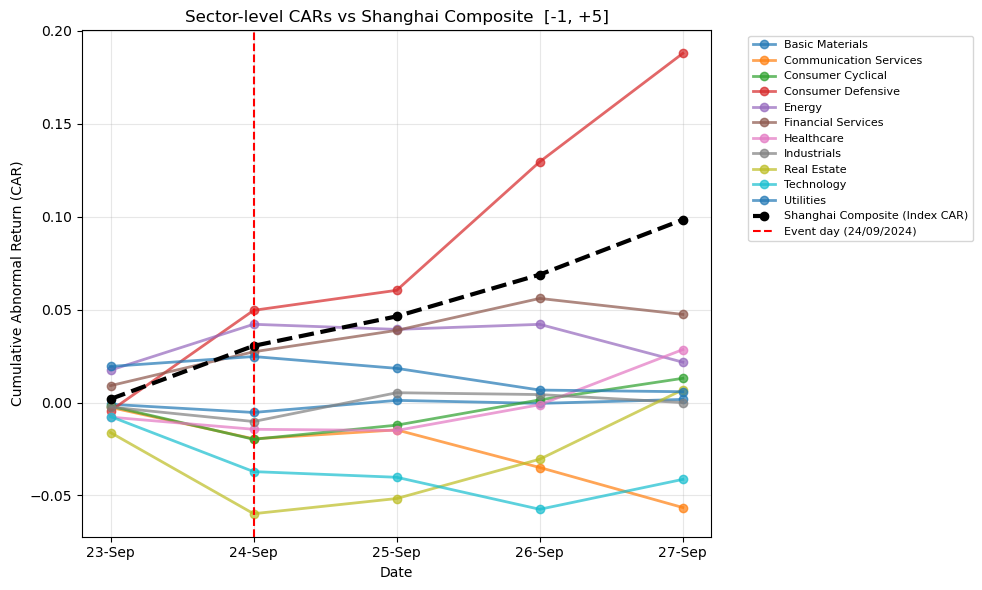

In [128]:
# === Plot CAR per tutti i settori + Shanghai Composite Index ===
plt.figure(figsize=(10, 6))

# 1) Plotta tutti i settori
for s in ew_sector_CAR.columns:
    plt.plot(ew_sector_CAR.index, ew_sector_CAR[s],
             marker='o', linewidth=2, alpha=0.7, label=s)

# 2) Aggiungi il CAR dell'indice SCI (linea più spessa e scura)
plt.plot(CAR_idx.index, CAR_idx.values,
         color='black', linewidth=3, linestyle='--', marker='o',
         label='Shanghai Composite (Index CAR)')

# 3) Linea verticale per l’evento
plt.axvline(t0, color='r', ls='--', linewidth=1.5, label='Event day (24/09/2024)')

# 4) Dettagli grafico
plt.title('Sector-level CARs vs Shanghai Composite  [-1, +5]')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('Cumulative Abnormal Return (CAR)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


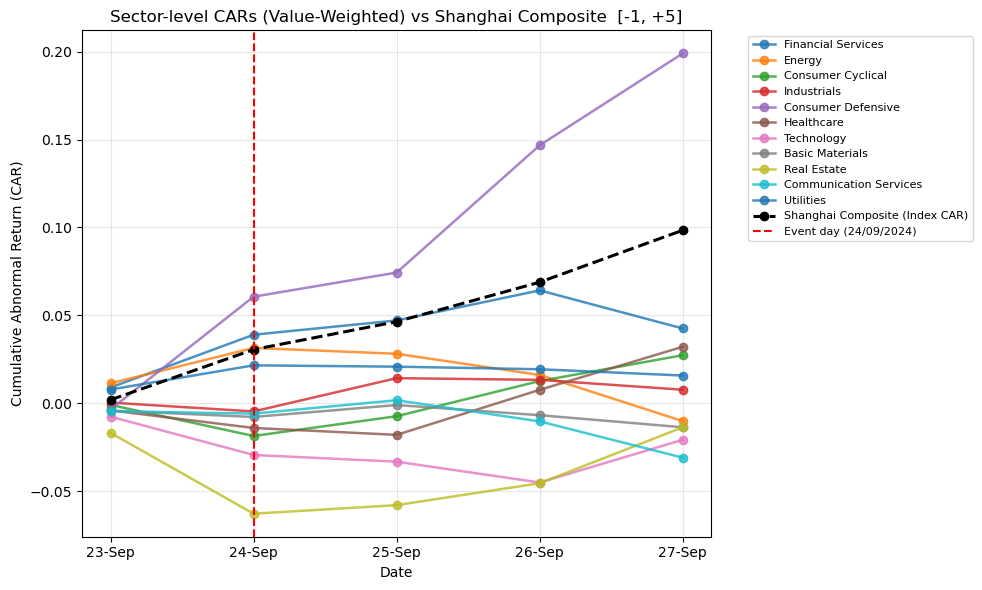

In [129]:
# === Plot CAR per tutti i settori (Value-Weighted) + Shanghai Composite ===
plt.figure(figsize=(10, 6))

#  Plotta tutti i settori (CAR value-weighted)
for s in vw_sector_CAR.columns:
    plt.plot(vw_sector_CAR.index, vw_sector_CAR[s],
             marker='o', linewidth=1.8, alpha=0.8, label=f"{s}")

# Aggiungi il CAR dell’indice SCI (linea più spessa e scura)
plt.plot(CAR_idx.index, CAR_idx.values,
         color='black', linewidth=2.2, linestyle='--', marker='o',
         label='Shanghai Composite (Index CAR)')

#Linea verticale per la data evento
plt.axvline(t0, color='r', ls='--', linewidth=1.5, label='Event day (24/09/2024)')

# 4️Dettagli grafico
plt.title('Sector-level CARs (Value-Weighted) vs Shanghai Composite  [-1, +5]')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('Cumulative Abnormal Return (CAR)')
plt.xlabel('Date')

# 5️Legenda e layout
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **SINCHRONICITY: PEERS GROUP REGRESSION ON S_C_I**

# PRE EVENT

In [130]:

def REG_pre(stocks_ante, T, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_ante.columns:
        s = stocks_ante[tkr].dropna()
        r_peers = np.log(s) - np.log(s.shift(T))         
        y = r_peers
        x = np.log(S_C_I) - np.log(S_C_I.shift(T))                       
        df = pd.concat([x, y], axis=1, join='inner').dropna()
        df.columns = ['x','y']
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            reg = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            reg = sm.OLS(df['y'], X).fit()

        beta = reg.params['x']
        tval = reg.tvalues['x']
        pval = reg.pvalues['x']
        r2   = reg.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(reg.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
REG_pre(stocks_ante, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.416008,5.466738,4.583930e-08,***,0.114054,152
600009.SS,0.846335,7.599527,2.972159e-14,***,0.317292,152
600011.SS,0.525373,3.058649,2.223379e-03,***,0.068750,152
600015.SS,0.355867,3.424857,6.151233e-04,***,0.075253,152
600016.SS,0.406203,5.287073,1.242891e-07,***,0.151686,152
...,...,...,...,...,...,...
601888.SS,1.500398,10.019146,1.255832e-23,***,0.367932,152
601899.SS,1.069046,5.803194,6.506353e-09,***,0.183708,152
601939.SS,0.059777,0.542812,5.872591e-01,,0.002019,152


In [131]:
results_REG_pre = REG_pre(stocks_ante, 1, robust=True, min_obs=30)
sig_REG_pre = results_REG_pre[results_REG_pre['Sign.'] != '']
print("Average R²(ALL):", results_REG_pre['R2'].mean())
print("Average Beta(ALL):", results_REG_pre['Beta'].mean())
print('Average R² (significant):', sig_REG_pre['R2'].mean())
print('Average Beta (significant):', sig_REG_pre['Beta'].mean())
print(f"N. of significant stocks: {len(sig_REG_pre)} / {len(results_REG_pre)}")

Average R²(ALL): 0.22096217598708776
Average Beta(ALL): 0.8794896228514535
Average R² (significant): 0.24568367133387503
Average Beta (significant): 0.970603388944664
N. of significant stocks: 79 / 88


# POST EVENT

In [132]:

def REG_post(stocks_post, T, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_post.columns:
        s = stocks_post[tkr].dropna()
        r_peers = np.log(s) - np.log(s.shift(T))         
        y = r_peers
        x = np.log(S_C_I) - np.log(S_C_I.shift(T))                       
        df = pd.concat([x, y], axis=1, join='inner').dropna()
        df.columns = ['x','y']
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            reg = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            reg = sm.OLS(df['y'], X).fit()

        beta = reg.params['x']
        tval = reg.tvalues['x']
        pval = reg.pvalues['x']
        r2   = reg.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(reg.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
REG_post(stocks_post, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.658267,5.699664,1.200437e-08,***,0.251584,249
600009.SS,0.846418,9.168722,4.786604e-20,***,0.659065,249
600011.SS,0.703833,11.340852,8.233933e-30,***,0.304942,249
600015.SS,0.729946,8.254343,1.527398e-16,***,0.311833,249
600016.SS,0.690797,10.250114,1.182040e-24,***,0.315952,249
...,...,...,...,...,...,...
601888.SS,1.424312,10.207092,1.843067e-24,***,0.559572,249
601899.SS,0.806945,5.000927,5.705538e-07,***,0.205908,249
601939.SS,0.270898,3.365544,7.639298e-04,***,0.071590,249


In [133]:
results_REG_post = REG_post(stocks_post, 1, robust=True, min_obs=30)
sig_REG_post = results_REG_post[results_REG_post['Sign.'] != '']
print("Average R²(All):", results_REG_post['R2'].mean())
print("Average Beta(ALL):", results_REG_post['Beta'].mean())
print('Average R² (significant):', sig_REG_post['R2'].mean())
print('Average Beta (significant):', sig_REG_post['Beta'].mean())
print(f"N. of significant stocks: {len(sig_REG_post)} / {len(results_REG_post)}")

Average R²(All): 0.3431217557450843
Average Beta(ALL): 0.9068168288776571
Average R² (significant): 0.3431217557450843
Average Beta (significant): 0.9068168288776571
N. of significant stocks: 88 / 88


# **MEC**

# *MEC before the event*

In [134]:

def MEC(stocks_ante, T, n_list=(2, 3, 4, 5)):
    var_T = (np.log(stocks_ante) - np.log(stocks_ante.shift(T))).var(numeric_only=True)

    MEC_dict = {}
    for n in n_list:
        var_Tn = (np.log(stocks_ante) - np.log(stocks_ante.shift(T * n))).var(numeric_only=True)
        MEC_dict[n] = (var_Tn / (n * var_T)).astype(float)

    # Crea DataFrame con righe = n e colonne = ticker
    MEC_df = pd.DataFrame(MEC_dict).T
    MEC_df.index.name = 'n'
    MEC_df.columns.name = 'Ticker'

    return MEC_df

MEC(stocks_ante,5)

Ticker,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
n,,,,,,,,,,,,,,,,,,,,,
2,0.746038,0.834603,0.807241,0.727005,0.893865,0.962719,0.889815,0.925181,0.781585,0.692926,...,0.922295,0.934923,0.592657,0.962338,0.614351,0.963511,0.781641,0.767147,0.767389,NaN
3,0.593038,0.676709,0.706301,0.561650,0.829488,0.870520,0.894245,0.935049,0.653252,0.451159,...,1.028684,0.967464,0.627102,0.961821,0.509643,0.969568,0.624679,0.817710,0.748020,NaN
4,0.486483,0.560440,0.578570,0.471913,0.712268,0.718885,0.741302,0.866048,0.559060,0.338132,...,0.993278,1.028222,0.608747,0.880941,0.457745,1.068541,0.559419,0.728054,0.656631,NaN
5,0.466741,0.465584,0.519674,0.414519,0.601584,0.595616,0.543347,0.781038,0.483487,0.288935,...,0.917596,0.927055,0.646002,0.776109,0.428967,1.204416,0.425925,0.645691,0.666502,NaN


In [135]:
MEC_results_pre= MEC(stocks_ante,5)
MEC_mean= pd.DataFrame(MEC_results_pre.mean(axis=1) , columns=['MEC_mean'])
MEC_mean

,MEC_mean
n,
2,0.842396
3,0.822236
4,0.777760
5,0.734682


# *MEC after the event*

In [136]:
def MEC(stocks_post, T, n_list=(2, 3, 4, 5)):
    var_T = (np.log(stocks_post) - np.log(stocks_post.shift(T))).var(numeric_only=True)

    MEC_dict = {}
    for n in n_list:
        var_Tn = (np.log(stocks_post) - np.log(stocks_post.shift(T * n))).var(numeric_only=True)
        MEC_dict[n] = (var_Tn / (n * var_T)).astype(float)

    # Crea DataFrame con righe = n e colonne = ticker
    MEC_df = pd.DataFrame(MEC_dict).T
    MEC_df.index.name = 'n'
    MEC_df.columns.name = 'Ticker'

    return MEC_df

MEC(stocks_post, 5)

Ticker,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
n,,,,,,,,,,,,,,,,,,,,,
2,0.924844,0.959975,0.785434,0.964518,0.778882,0.960995,1.041302,0.914943,0.893889,0.854862,...,1.127838,0.735004,0.840693,0.930236,0.738790,0.720780,0.865725,0.633536,0.885554,NaN
3,0.862755,0.923870,0.745325,0.893355,0.707121,0.941752,1.159675,0.939815,0.943114,0.845604,...,1.190914,0.618666,0.821520,1.063792,0.617199,0.612036,0.798821,0.516211,0.800957,NaN
4,0.849700,0.890360,0.746209,0.865557,0.647549,0.876646,1.245061,0.995879,0.966741,0.883910,...,1.203985,0.551838,0.725609,1.097345,0.524533,0.537361,0.653265,0.431411,0.737163,NaN
5,0.796974,0.849546,0.684839,0.805847,0.649619,0.815513,1.363718,1.016736,1.032479,0.886369,...,1.259589,0.564272,0.680664,1.052689,0.575680,0.457401,0.475893,0.441809,0.727356,NaN


In [137]:
MEC_results_post= MEC(stocks_post,5)
MEC_mean= pd.DataFrame(MEC_results_post.mean(axis=1) , columns=['MEC_mean'])
MEC_mean

,MEC_mean
n,
2,0.808765
3,0.775811
4,0.745830
5,0.738789


# **AUTOREGRESSION**

# *AUTOREGRESSION PRE EVENT*

In [138]:

def AR_pre(stocks_ante, T, n, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_ante.columns:
        s = stocks_ante[tkr].dropna()
        r = np.log(s) - np.log(s.shift(T))         
        y = r
        x = r.shift(T * n)                          
        df = pd.DataFrame({'y': y, 'x': x}).dropna()
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            res = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            res = sm.OLS(df['y'], X).fit()

        beta = res.params['x']
        tval = res.tvalues['x']
        pval = res.pvalues['x']
        r2   = res.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(res.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
AR_pre(stocks_ante, 1, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.012673,0.145847,0.884042,,0.000160,151
600009.SS,-0.038379,-0.450339,0.652466,,0.001475,151
600011.SS,0.042507,0.534037,0.593316,,0.001837,151
600015.SS,-0.043438,-0.416740,0.676869,,0.001848,151
600016.SS,0.052061,0.544328,0.586216,,0.002710,151
...,...,...,...,...,...,...
601888.SS,-0.096967,-1.168422,0.242637,,0.009396,151
601899.SS,-0.004112,-0.048229,0.961534,,0.000016,151
601939.SS,0.153990,1.262054,0.206929,,0.023755,151


In [139]:
result_AR_pre = AR_pre(stocks_ante, T=5, n=1, robust=True, min_obs=30)
sig_pre = result_AR_pre[result_AR_pre['Sign.'] != '']
print("Average R²(All):", result_AR_pre['R2'].mean())
print("Average Beta(ALL):", result_AR_pre['Beta'].mean())
print('Average R² (significant):', sig_pre['R2'].mean())
print('Average Beta (significant):', sig_pre['Beta'].mean())
print(f"N. of significant stocks: {len(sig_pre)} / {len(result_AR_pre)}")

Average R²(All): 0.031044573405643358
Average Beta(ALL): -0.108680523514489
Average R² (significant): 0.06945908873469143
Average Beta (significant): -0.20505835388404317
N. of significant stocks: 35 / 88


# *AUTOREGRESSION POST EVENT*

In [140]:

def AR_post(stocks_post, T, n, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_post.columns:
        s = stocks_post[tkr].dropna()
        r = np.log(s) - np.log(s.shift(T))         
        y = r
        x = r.shift(T * n)                          
        df = pd.DataFrame({'y': y, 'x': x}).dropna()
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            res = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            res = sm.OLS(df['y'], X).fit()

        beta = res.params['x']
        tval = res.tvalues['x']
        pval = res.pvalues['x']
        r2   = res.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(res.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
AR_post(stocks_post, 1, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,-0.133940,-1.397172,0.162362,,0.018415,248
600009.SS,0.114589,0.783095,0.433571,,0.013144,248
600011.SS,-0.103568,-1.152065,0.249294,,0.010565,248
600015.SS,-0.107575,-1.088938,0.276181,,0.011787,248
600016.SS,-0.068890,-0.742156,0.457993,,0.004779,248
...,...,...,...,...,...,...
601888.SS,0.181222,1.116471,0.264220,,0.032683,248
601899.SS,-0.009233,-0.129857,0.896680,,0.000079,248
601939.SS,-0.217379,-2.679579,0.007371,***,0.047268,248


In [141]:
result_AR_post = AR_post(stocks_post, T=5, n=1, robust=True, min_obs=30)
sig_post = result_AR_post[result_AR_post['Sign.'] != '']
print("Average R²(All):", result_AR_post['R2'].mean())
print("Average Beta(ALL):", result_AR_post['Beta'].mean())
print('Average R² (significant):', sig_post['R2'].mean())
print('Average Beta (significant):', sig_post['Beta'].mean())
print(f"N. of significant stocks: {len(sig_post)} / {len(result_AR_post)}")

Average R²(All): 0.03497208919497918
Average Beta(ALL): -0.1189255532254936
Average R² (significant): 0.05608365490905912
Average Beta (significant): -0.18046883952075288
N. of significant stocks: 52 / 88
